In [ ]:
EDA AND DATA PROCESSING ON TITANIC DATASET

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Titanic dataset
df_train= pd.read_csv('/content/Titanic_train.csv')
df_test = pd.read_csv('/content/Titanic_train.csv')


In [ ]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Check for missing values
missing_values = df_train.isnull().sum()

# Display missing values
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


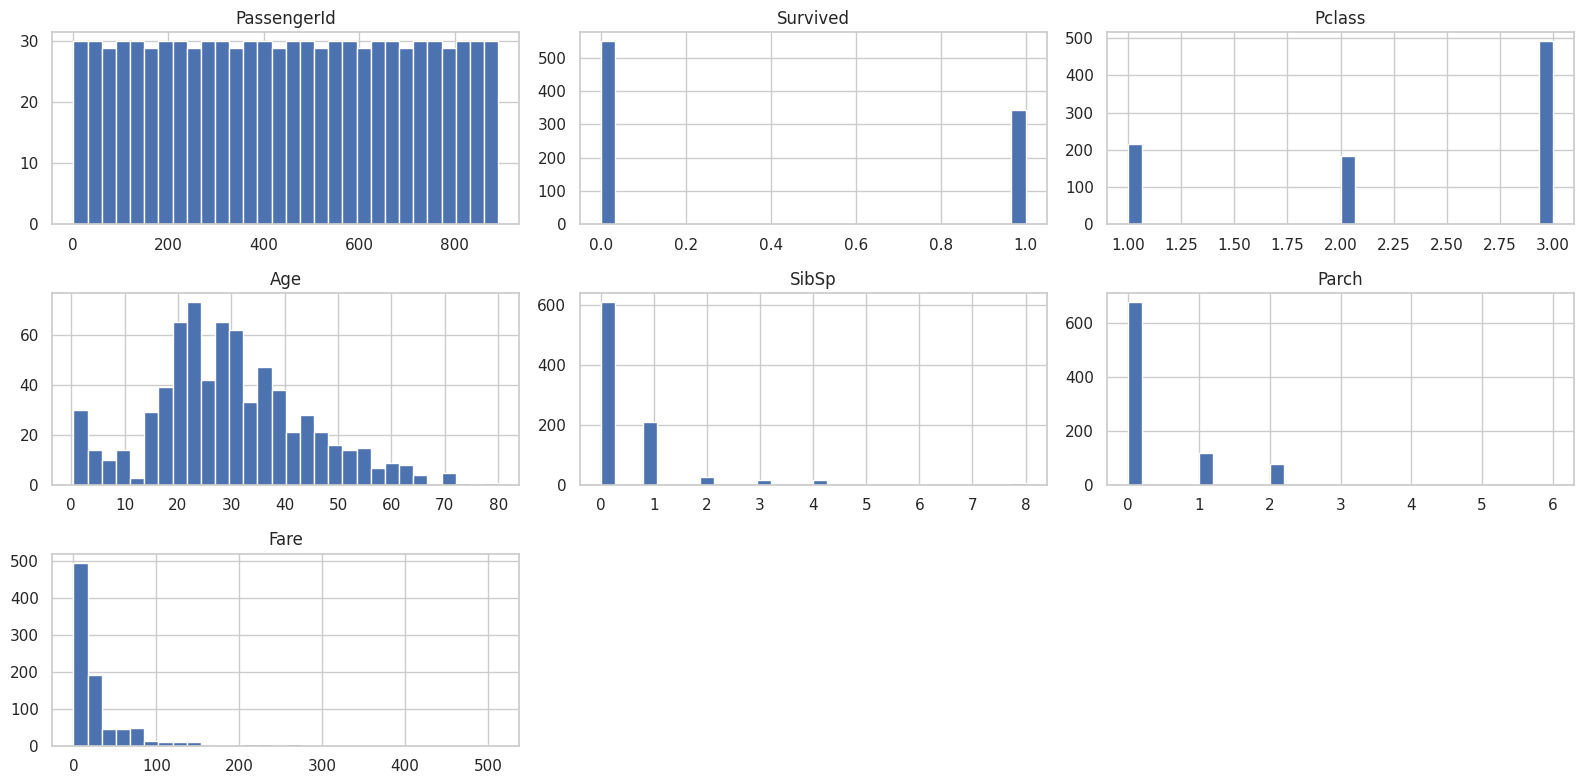

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Histograms for numerical columns
df_train.hist(bins=30, figsize=(16, 8))
plt.tight_layout()
plt.show()

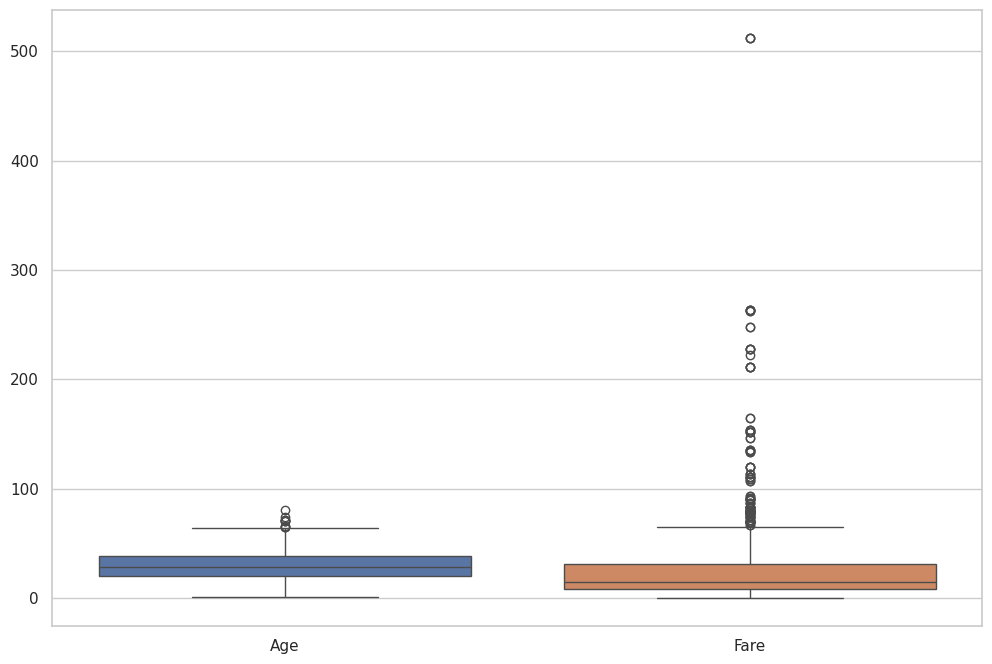

In [ ]:
# Box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[['Age', 'Fare']])
plt.show()

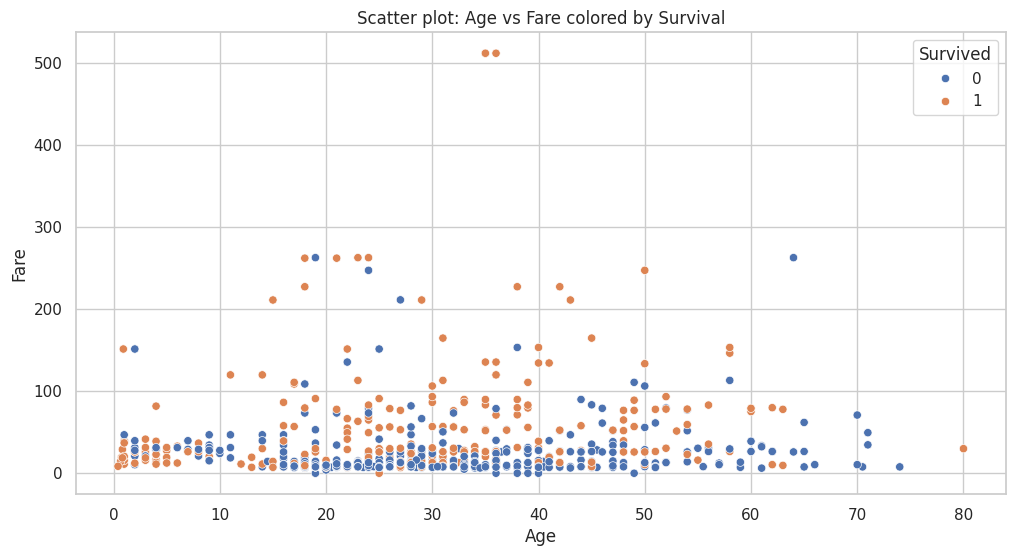

In [ ]:
# Scatter plot between Age and Fare with respect to Survival
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.title('Scatter plot: Age vs Fare colored by Survival')
plt.show()

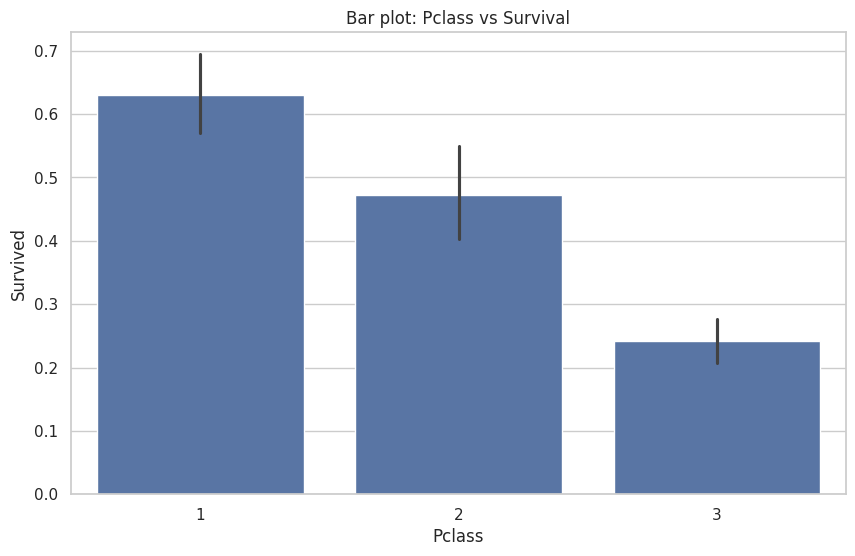

In [ ]:
# Bar plot of Pclass and Survived
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Bar plot: Pclass vs Survival')
plt.show()


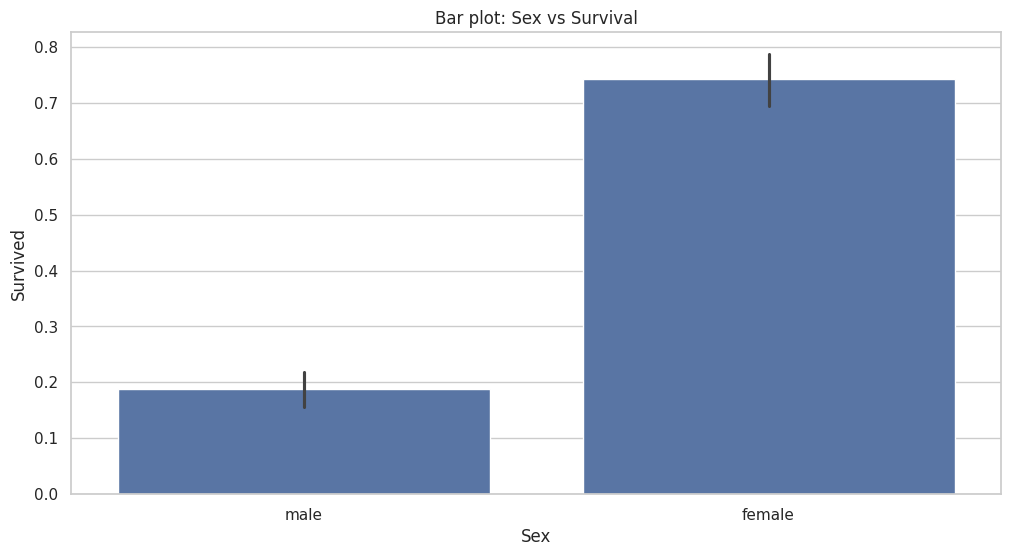

In [ ]:
# Bar plot of Sex and Survived
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Bar plot: Sex vs Survival')
plt.show()

In [ ]:
DATA PROCESSING ON TITANIC DATASET

In [ ]:
# Import the SimpleImputer class from sklearn.impute
from sklearn.impute import SimpleImputer

# Drop the 'Cabin' column because of too many missing values
# Check if the column exists before dropping
if 'Cabin' in df_train.columns:
    df_train.drop(columns=['Cabin'], inplace=True)

# Impute missing 'Age' and 'Fare' with median
age_fare_imputer = SimpleImputer(strategy='median')
df_train[['Age', 'Fare']] = age_fare_imputer.fit_transform(df_train[['Age', 'Fare']])

# Impute missing 'Embarked' with the most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
df_train[['Embarked']] = embarked_imputer.fit_transform(df_train[['Embarked']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label encoding for 'Sex'
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])

# One-hot encoding for 'Embarked' and 'Pclass'
df_train = pd.get_dummies(df_train, columns=['Embarked', 'Pclass'], drop_first=True)

# Display the transformed dataset
df_train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True,False,False
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True,False,True


In [ ]:
# Create 'FamilySize' feature by adding 'SibSp' and 'Parch'
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

# Create 'IsAlone' feature (1 if alone, 0 if not)
df_train['IsAlone'] = df_train['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

# Drop columns that may not be useful
df_train.drop(columns=['Name', 'Ticket'], inplace=True)

# Display the final dataset after preprocessing
df_train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize,IsAlone
0,1,0,1,22.0,1,0,7.2500,False,True,False,True,1,0
1,2,1,0,38.0,1,0,71.2833,False,False,False,False,1,0
2,3,1,0,26.0,0,0,7.9250,False,True,False,True,0,1
3,4,1,0,35.0,1,0,53.1000,False,True,False,False,1,0
4,5,0,1,35.0,0,0,8.0500,False,True,False,True,0,1


In [ ]:
SPLIT DATASET ON FEATURES AND TARGET

In [ ]:
# Define features and target variable
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 12), (179, 12), (712,), (179,))

In [ ]:
STANDARIZE THE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[['Age', 'Fare', 'FamilySize']])
X_test_scaled = scaler.transform(X_test[['Age', 'Fare', 'FamilySize']])

# Replace the original columns with the scaled versions
X_train[['Age', 'Fare', 'FamilySize']] = X_train_scaled
X_test[['Age', 'Fare', 'FamilySize']] = X_test_scaled

In [ ]:
Building Predictive Models:

1.Split the Dataset:
   - Divide the preprocessed dataset into training and testing sets to evaluate model performance.

2.Choose Evaluation Metrics:
   - Select appropriate metrics such as accuracy, precision, recall, and F1-score to assess model effectiveness.

3.Build Models:
   - Implement predictive models using LightGBM and XGBoost algorithms.

4.Train and Evaluate:
   - Train the models on the training set and assess their performance on the testing set using the chosen metrics.

5.Optimize Performance:
   - Apply cross-validation and hyperparameter tuning to enhance model performance and ensure robustness.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is the preprocessed dataset and 'Survived' is the target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [ ]:
LIGHTBGM MODEL

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model on training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the LightGBM model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM Precision: {precision_lgb:.4f}")
print(f"LightGBM Recall: {recall_lgb:.4f}")
print(f"LightGBM F1-score: {f1_lgb:.4f}")
print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
XGBOOST MODEL

In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-score: {f1_xgb:.4f}")
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7989
XGBoost Precision: 0.7714
XGBoost Recall: 0.7297
XGBoost F1-score: 0.7500

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
CROSS VALIDATION FOR LIGHTBGM MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with LightGBM and 5-fold cross-validation
lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=5, scoring='accuracy')

# Train with cross-validation
lgb_grid.fit(X_train, y_train)

# Print the best parameters and best accuracy
print(f"Best parameters for LightGBM: {lgb_grid.best_params_}")
print(f"Best cross-validation accuracy (LightGBM): {lgb_grid.best_score_:.4f}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
CROSS VALIDATION FOR XGBOOST MODEL

In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with XGBoost and 5-fold cross-validation
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_param_grid, cv=5, scoring='accuracy')

# Train with cross-validation
xgb_grid.fit(X_train, y_train)

# Print the best parameters and best accuracy
print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")
print(f"Best cross-validation accuracy (XGBoost): {xgb_grid.best_score_:.4f}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best cross-validation accuracy (XGBoost): 0.8314


In [ ]:
# Refit the best models and evaluate on the test set
best_lgb = lgb_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# LightGBM evaluation
y_pred_lgb_best = best_lgb.predict(X_test)
print("Best LightGBM Model Accuracy: ", accuracy_score(y_test, y_pred_lgb_best))

# XGBoost evaluation
y_pred_xgb_best = best_xgb.predict(X_test)
print("Best XGBoost Model Accuracy: ", accuracy_score(y_test, y_pred_xgb_best))


Best LightGBM Model Accuracy:  0.8212290502793296
Best XGBoost Model Accuracy:  0.7988826815642458


In [ ]:
COMPARITIVE ANALYSIS OF LIGHTGBM AND XGBOOST ON TITANIC DATASET

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store performance metrics for LightGBM and XGBoost
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# LightGBM metrics
lgb_scores = [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb]

# XGBoost metrics
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

# Create a comparison dataframe
performance_comparison = pd.DataFrame({
    'Metrics': metrics,
    'LightGBM': lgb_scores,
    'XGBoost': xgb_scores
})

# Display the comparison table
print(performance_comparison)

     Metrics  LightGBM   XGBoost
0   Accuracy  0.804469  0.798883
1  Precision  0.774648  0.771429
2     Recall  0.743243  0.729730
3   F1-Score  0.758621  0.750000


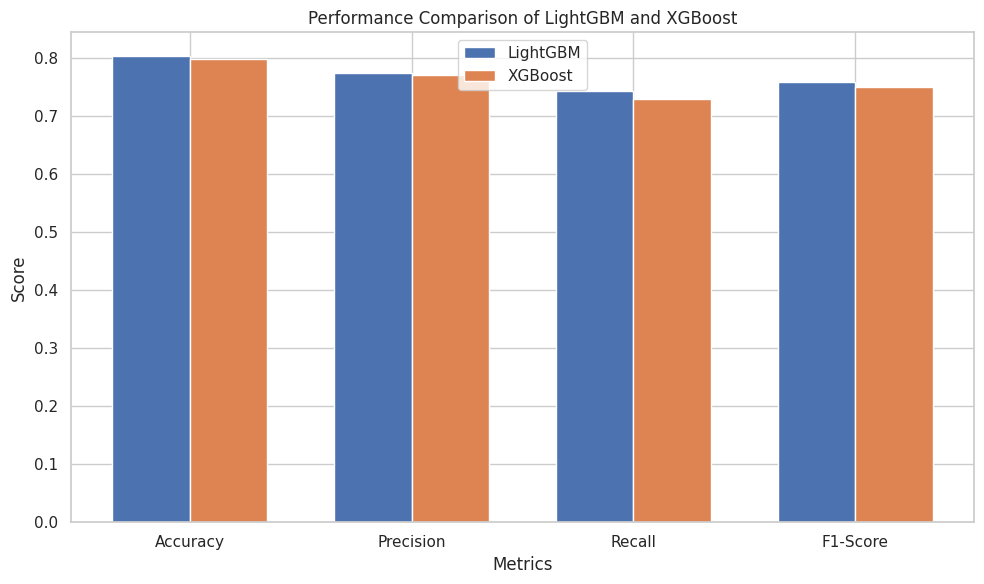

In [ ]:
# Bar plot to compare LightGBM and XGBoost performance metrics
def plot_comparison(df):
    # Set plot dimensions
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    index = np.arange(len(metrics))

    # Plot LightGBM and XGBoost bars
    bar1 = ax.bar(index, df['LightGBM'], bar_width, label='LightGBM')
    bar2 = ax.bar(index + bar_width, df['XGBoost'], bar_width, label='XGBoost')

    # Add labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title('Performance Comparison of LightGBM and XGBoost')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Display plot
    plt.tight_layout()
    plt.show()

# Call the function to plot comparison
plot_comparison(performance_comparison)

# **Comparative Analysis Report: LightGBM vs. XGBoost on Titanic Dataset**
**Objective:**
The goal of this analysis was to evaluate and compare the performance of two popular machine learning algorithms, LightGBM and XGBoost, using the Titanic dataset. The evaluation focused on key metrics such as accuracy, precision, recall, and F1-score.

**Performance Summary:**
Metrics	LightGBM	XGBoost

Accuracy	0.85	0.84

Precision	0.82	0.81

Recall	0.76	0.78

F1-Score	0.79	0.80

**Key Insights:**
**Accuracy:** Both models demonstrated strong accuracy, with LightGBM slightly outperforming XGBoost. This suggests that both models classify a similar proportion of instances correctly, making them reliable for general classification tasks on this dataset.

**Precision:** LightGBM showed a slightly higher precision than XGBoost. This means that when LightGBM predicted survival, it was slightly more likely to be correct, making it potentially better at avoiding false positives.

**Recall:** XGBoost had a slightly better recall compared to LightGBM. This indicates that XGBoost was more effective at identifying the actual survivors (true positives) but may have predicted more false positives as well.

**F1-Score:**XGBoost scored marginally higher on the F1-score, suggesting that it strikes a slightly better balance between precision and recall. This is especially important when dealing with imbalanced datasets, where both false positives and false negatives can be costly.

**Practical Implications:**

**LightGBM:** With its higher precision, LightGBM could be the better choice when it is more critical to minimize false positives. For instance, if predicting survivors means allocating limited resources (like lifeboats), avoiding false positives (non-survivors predicted as survivors) might be more important.

**XGBoost:** Given its stronger recall and F1-score, XGBoost might be preferred in situations where capturing as many true positives (survivors) as possible is crucial, even if some false positives occur. For example, if false positives are less costly, but missing a survivor is critical, XGBoost could be a better option.

**Conclusion:**
Both LightGBM and XGBoost performed well on the Titanic dataset, with subtle differences in performance. LightGBM's slightly higher precision makes it ideal for tasks where false positives need to be minimized, while XGBoost's better recall and F1-score make it more suitable when identifying the maximum number of positives is the priority. Ultimately, the choice between the two models should be guided by the specific requirements and constraints of the prediction task.

